In [ ]:
"""
Created on Sun Feb 2 2020 

@author: Mohammad Daneshvar
"""

This is a simple project for image classification and I'm going to use a convnet for this purpose. The network is built with Keras library in Tensorflow. First, I import the required libraries.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

I will use Fashion-MNIST data which includes images of clothes from 10 classes:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot





In [ ]:
"""Load the data"""

image_data = tf.keras.datasets.fashion_mnist.load_data()
(Xtrain, Ytrain), (Xtest, Ytest) = image_data

The training and test sets are numpy arrays. 

In [ ]:
print('Xtrain=%s and Ytrain=%s' %(Xtrain.shape, Ytrain.shape))
print('Xtest=%s and Ytest=%s' %(Xtest.shape, Ytest.shape),'\n')
print('Xtrain[0]=\n', Xtrain[0])

Xtrain=(60000, 28, 28) and Ytrain=(60000,)
Xtest=(10000, 28, 28) and Ytest=(10000,) 

Xtrain[0]=
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163

 To visualize the data, I convert the numpy arrays into images using the matplotlib library.

In [ ]:
classes = [i for i in range(10)]
types = 'T_shirt/top Trouser Pullover Dress Coat\
 Sandal Shirt Sneaker Bag Ankle_boot'.split()

labels = dict(zip(classes, types))    
print('labels=\n',labels)          

labels=
 {0: 'T_shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle_boot'}


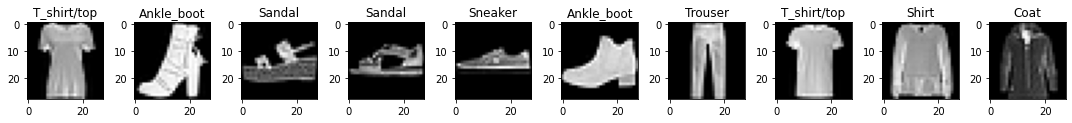

In [ ]:
"""Visualize the data"""

def convert_to_pic(X, Y, figsize):
  fig, ax = plt.subplots(1, len(X), figsize=figsize)
  
  for i in range(len(X)):
    ax[i].imshow(X[i])
    plt.set_cmap(None)
    ax[i].set_title('%s'%labels[Y[i]])
  plt.tight_layout()
  return

convert_to_pic(Xtrain[10:20], Ytrain[10:20], figsize=(15,7) )

Now I build a convolutional neural network with TensorFlow. First, I normalize the data to make values between 0 and 1. The normalization technique helps the gradient descent to converge faster to the global minimum. The formula for the normalization is
$$z_{i} = \frac{max(x)-x_{i}}{max(x)-min(x)}$$

In [ ]:
"""Normalize the data"""

Xtrain = Xtrain / 255.
Xtest = Xtest /255.

 There are three main layers in a CNN: A convolutional layer ( followed by ), a pooling layer, and a fully-connected layer ( as we have seen in a deep neural network ). We will stack all these three main layers using a sequential model. But first, we need to reshape the train set to specify the number of channels for each image. In fashion_mnist data, each image has one channel. More specifically, each image is an array of $28\times28$ which can be presented as an image of $28\times28\times1$. 

 We can also add a callback for early stopping. This callback stops the training if the loss doesn't decrease (or accuracy doesn't increase). It includes a parameter called patience which is a criterion by which we specify when to stop the training. For example, if the patience number is three, then the training stops if the loss (or accuracy) doesn't improve after three epochs.

 We use the 'relu' function for the convolutional layers because this activation function has some advantages over sigmoid and tanh. It is non-saturating and less complex and therefore the training time will become faster. Since we have a multiclass classification, therefore we use the softmax function for the last layer as it outputs the probability of being in each class.

In [ ]:
"""reshape the data"""

Xtrain = Xtrain.reshape((60000,28,28,1))
Xtest = Xtest.reshape((10000,28,28,1))

In [ ]:
"""build the convnet layers"""

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (4,4), input_shape=(28,28,1), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=256, activation='relu'),
                                    tf.keras.layers.Dense(units=10, activation='softmax')])

We can look at the summary of the model to see if it's a good idea to add more layers. In this model, the last max-pooling layer reduces the dimension of images to $4\times4$ (with 64 channels), which is small enough and can be flattened for the fully connected layer. Moreover, the total number of parameters for training is $331,658$. 

$2\times2$ Pooling layers quarters the dimension of the images while preserving their main features.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
"""fit the model to the data"""

history = model.fit(Xtrain, Ytrain, batch_size=512, epochs=10, callbacks=[callback])

Epoch 1/10
118/118 [==============================] - 2s 14ms/step - loss: 0.7503 - accuracy: 0.7312
Epoch 2/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4595 - accuracy: 0.8330
Epoch 3/10
118/118 [==============================] - 2s 13ms/step - loss: 0.3907 - accuracy: 0.8594
Epoch 4/10
118/118 [==============================] - 2s 13ms/step - loss: 0.3483 - accuracy: 0.8736
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3224 - accuracy: 0.8833
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3005 - accuracy: 0.8897
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2788 - accuracy: 0.8989
Epoch 8/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2634 - accuracy: 0.9047
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2523 - accuracy: 0.9089
Epoch 10/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2379 - accura

In [ ]:
# accuracy on test set
loss, accuracy = model.evaluate(Xtest, Ytest)
print('loss on the test set=', loss)
print('accuracy on the test set=', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.8946
loss on the test set= 0.2895423471927643
accuracy on the test set= 0.894599974155426


Accuracy on the test set is slightly less than the accuracy on the train set and this is what we expected. If it was much lower, that could be a sign of overfitting. 

Finally we see how the model predicts unseen examples in the test set. Gray pictures indicate the correct predictions whereas the red pictures indicate the wrong the predictions.

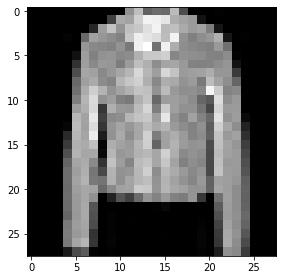

Category:  Coat
Prediction:  Coat 



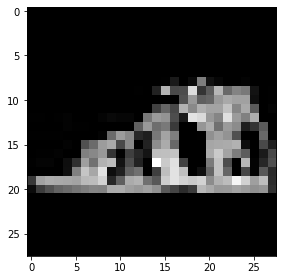

Category:  Sandal
Prediction:  Sandal 



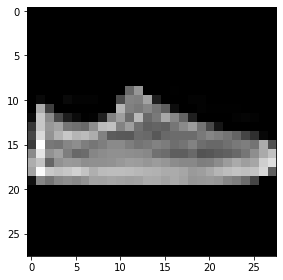

Category:  Sneaker
Prediction:  Sneaker 



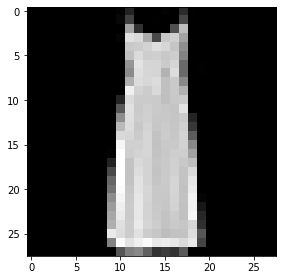

Category:  Dress
Prediction:  Dress 



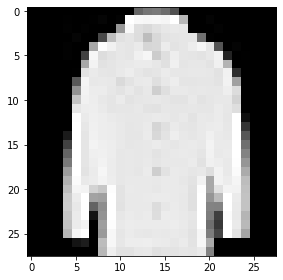

Category:  Coat
Prediction:  Coat 



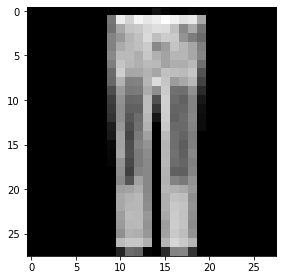

Category:  Trouser
Prediction:  Trouser 



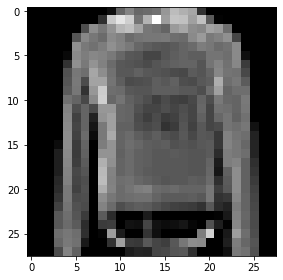

Category:  Pullover
Prediction:  Pullover 



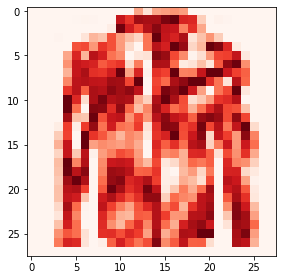

Category:  Coat
Prediction:  Pullover 



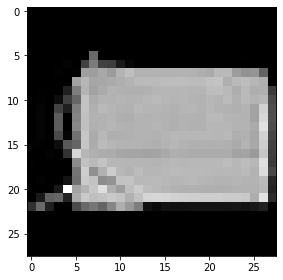

Category:  Bag
Prediction:  Bag 



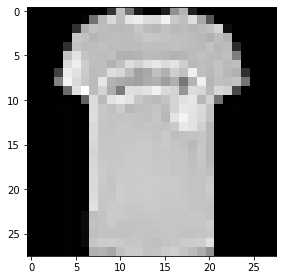

Category:  T_shirt/top
Prediction:  T_shirt/top 



In [ ]:
# prediction
def predict(X):
  probabilities = model.predict(X)
  predictions = [np.argmax(prob_arr) for prob_arr in probabilities]
  return predictions
  

def convert_to_pic(X, **kwargs):
    plt.imshow(X)
    plt.set_cmap('gray')
    if prediction != "correct":
       plt.set_cmap('Reds')
    plt.tight_layout()   
    plt.show()


categories = predict(Xtest)
for n in range(10,20):
    prediction = "correct"
    if categories[n]!= Ytest[n]: 
      prediction = "incorrect"
    convert_to_pic(Xtest[n,:].reshape((28,28)), prediction = prediction)
    print('Category: ', labels[Ytest[n]])
    print("Prediction: ", labels[categories[n]], '\n')